Task 5: Personal Loan Acceptance Prediction

In [48]:
#Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [4]:
# Load dataset:

df = pd.read_csv("Bank Marketing.csv")
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')


In [5]:
# Preview dataset structure:

print(df.shape)
df.head(15)

(11162, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


1. Handling Missing Values

In [6]:
# Show missing values:

print("Missing Values:\n",df.isnull().sum())

Missing Values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


2. Categorical Encoding

In [7]:
# Encode categorical variables

le = LabelEncoder()
df_encoded = df.copy()

for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = le.fit_transform(df_encoded[col])

In [8]:
df.rename(columns={'loan': 'y'}, inplace=True)

3. Advanced Visualizations

a) Count Plot – Personal Loan Acceptance by Job

Insight:

Visualizes the distribution of target classes.

Shows class imbalance, with one class having significantly more instances than others, which might affect model performance

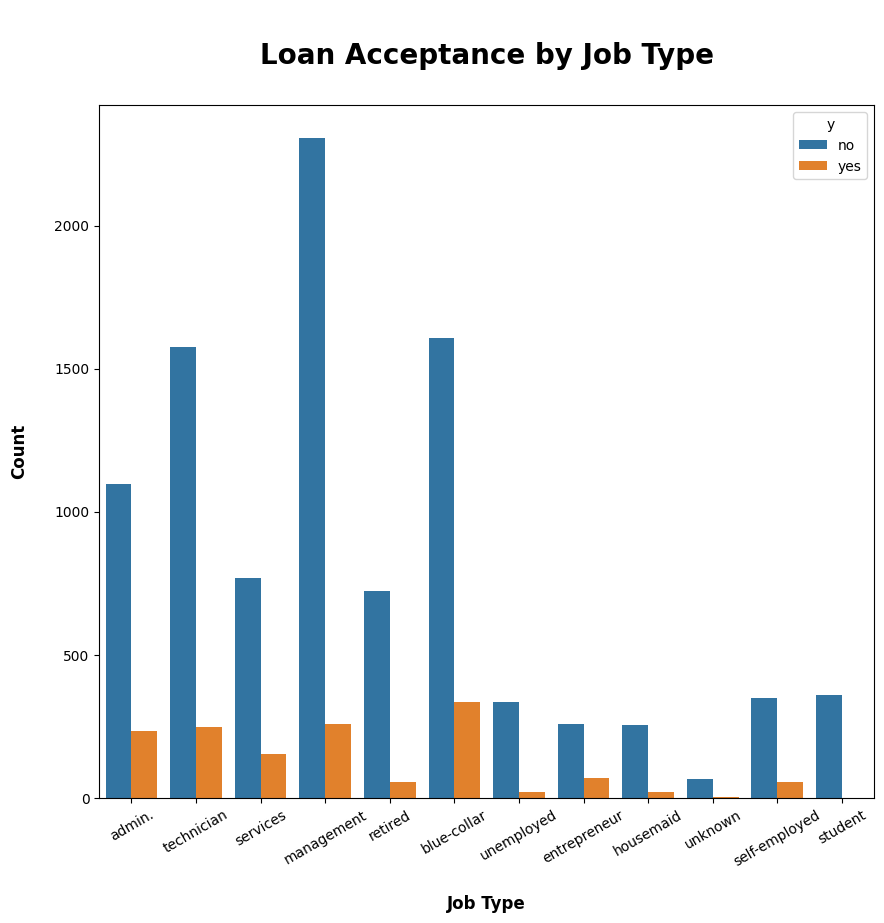

In [92]:
plt.figure(figsize=(10,9))
sns.countplot(x='job', hue='y', data=df)
plt.title("\nLoan Acceptance by Job Type\n", fontsize=20, fontweight='bold')
plt.xlabel("\nJob Type", fontsize=12, fontweight='bold')
plt.ylabel("Count\n", fontsize=12, fontweight='bold')
plt.xticks(rotation=30)
plt.show()

b) Heatmap – Feature Correlation (All features with numerical encoding)

(Correlation Matrix)
Insight:

Highlights strong positive and negative correlations between numerical features.

Helps identify redundant features and possible multicollinearity issues.

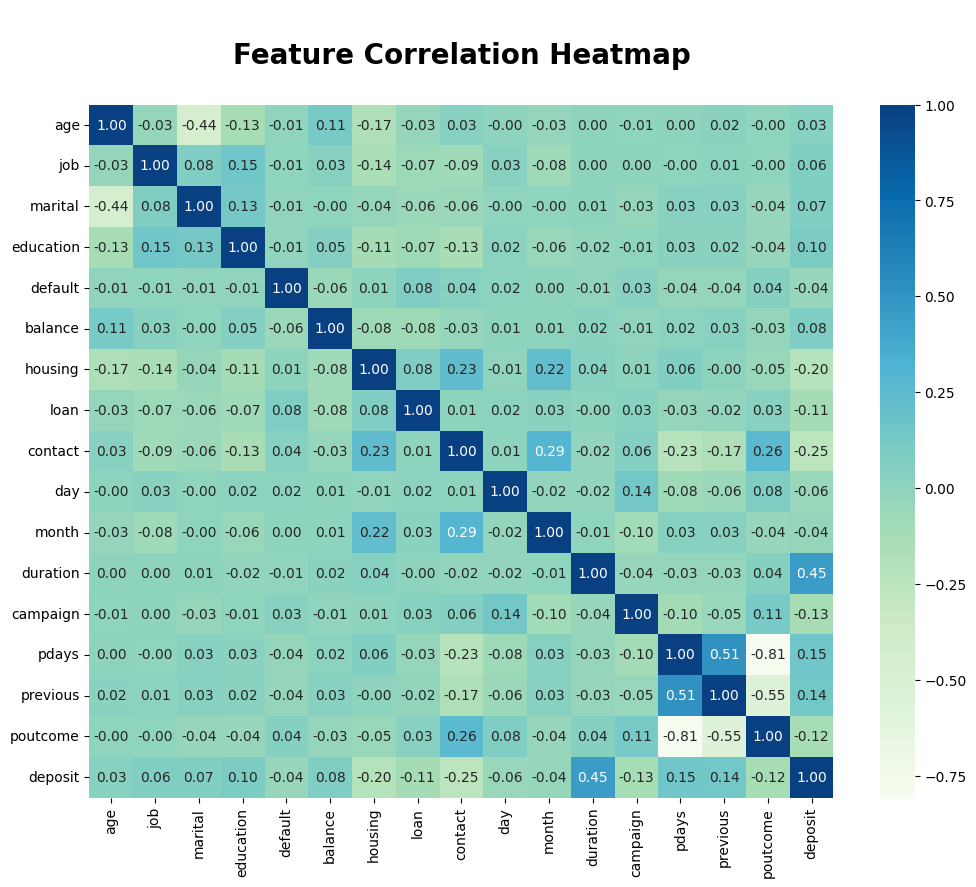

In [90]:
plt.figure(figsize=(12,9))
sns.heatmap(df_encoded.corr(), annot=True, cmap="GnBu", fmt=".2f")
plt.title("\nFeature Correlation Heatmap\n", fontsize=20, fontweight='bold')
plt.show()

b) Heatmap – Feature Correlation (Only Numerical Features in the real Dataset)

(Model Evaluation Metrics)
Insight:

Displays performance scores (e.g., precision, recall, F1) for each class.

Shows which classes are predicted more accurately and which need improvement.

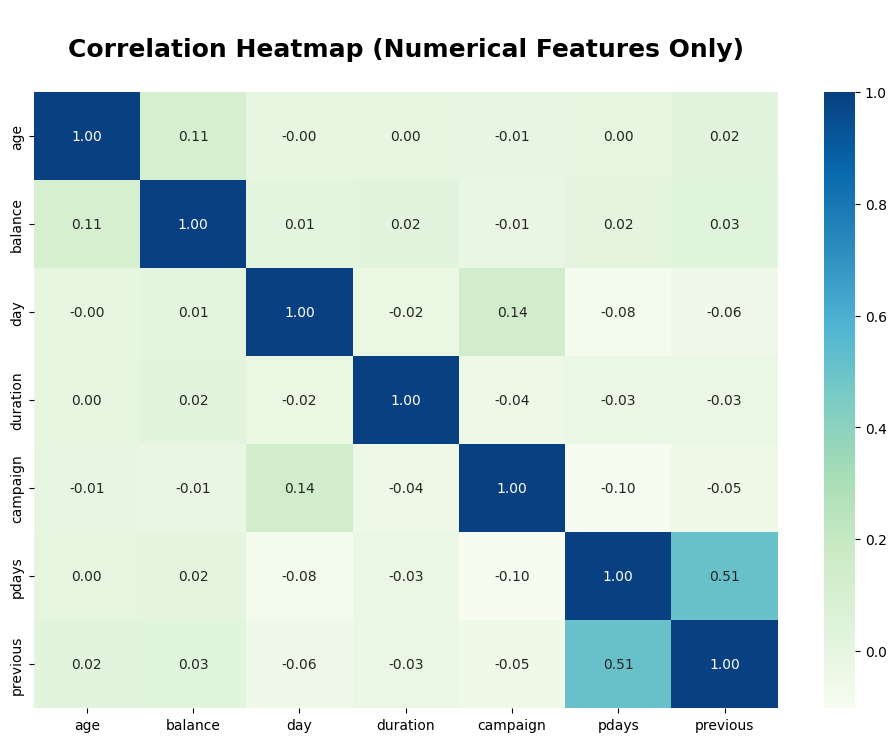

In [87]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="GnBu", fmt=".2f")
plt.title("\nCorrelation Heatmap (Numerical Features Only)\n", fontsize=18, fontweight='bold')
plt.show()


c)  Box Plot – Age vs Loan Acceptance

Box Plot
Insight:

Reveals the spread and distribution of feature values.

Outliers are visible, which may require preprocessing.

Median differences indicate potential separation power between classes.

C:\Users\PMLS\AppData\Local\Temp\ipykernel_23104\2431523197.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='y', y='age', data=df, palette="Reds")


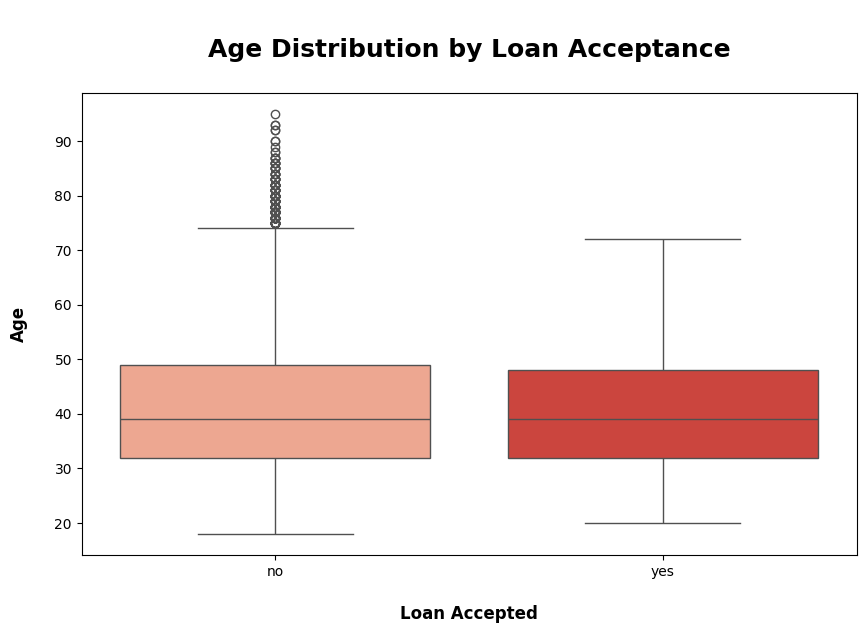

In [86]:
plt.figure(figsize=(10,6))
sns.boxplot(x='y', y='age', data=df, palette="Reds")
plt.title("\nAge Distribution by Loan Acceptance\n", fontsize=18, fontweight='bold')
plt.xlabel("\nLoan Accepted", fontsize=12, fontweight='bold')
plt.ylabel("Age\n", fontsize=12, fontweight='bold')
plt.show()

4. Data Cleaning

In [ ]:
# If y_train contains strings like 'yes'/'no', encode them:

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Check for object columns
print(X_train.select_dtypes(include='object').columns)

# Flatten y_train to 1D if it’s 2D:
y_train = y_train.ravel()

Index(['job', 'marital', 'education', 'default', 'housing', 'contact', 'month',
       'poutcome', 'deposit'],
      dtype='object')


In [49]:
print(X_train.shape)   # Should be (n_samples, n_features)
print(y_train.shape)   # Should be (n_samples,)

# List of categorical columns (as shown in your output)
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 
                    'contact', 'month', 'poutcome', 'deposit']

# Create ColumnTransformer to apply OneHotEncoder only on categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Keep the rest of the columns as they are
)

# Fit and transform the data
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

(8929, 16)
(8929,)


5. Features Selection & Test/Split

In [50]:
# Define Features & Target
X = df.drop("y", axis=1)
y = df["y"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

6. Train Model (Random Forest)

In [52]:
# Train Random Forest Classifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train_encoded, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [57]:
# Predict
y_pred = model.predict(X_test_encoded)

7. Model Evaluation

In [58]:
# Accuracy & Classification Report:

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8759516345723243

Classification Report:
               precision    recall  f1-score   support

          no       0.88      0.99      0.93      1960
         yes       0.44      0.06      0.10       273

    accuracy                           0.88      2233
   macro avg       0.66      0.52      0.52      2233
weighted avg       0.83      0.88      0.83      2233



Confusion Matrix
Insight:

Shows correct vs. incorrect predictions for each class.

High diagonal values indicate strong predictive accuracy, while off-diagonal values highlight misclassification patterns.

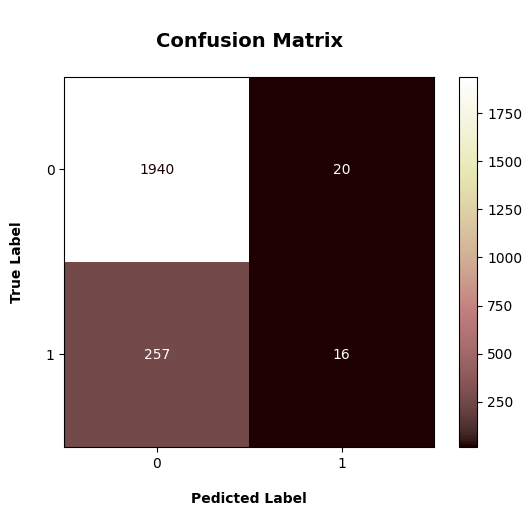

In [82]:
#Plot Confusion Matrix:

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="pink")
plt.title("\nConfusion Matrix\n", fontsize=14, fontweight='bold')
plt.xlabel("\nPedicted Label", fontsize=10, fontweight='bold')
plt.ylabel("True Label\n", fontsize=10, fontweight='bold')
plt.show()


Fixing: You encoded your features using OneHotEncoder, so X_train_encoded is a sparse matrix with many new columns.
So to match feature importance with column names, do this:

8. Get feature names from the encoder

In [73]:
# Get OneHotEncoder feature names
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)

# Get full feature list (including passthrough numeric columns)
all_features = np.hstack([ohe_feature_names, X.select_dtypes(exclude='object').columns])

9. Plot feature importances

Feature Importance Chart
Insight:

Ranks features based on their contribution to the model’s predictions.

Top features have the greatest impact, which can guide feature selection for model optimization.

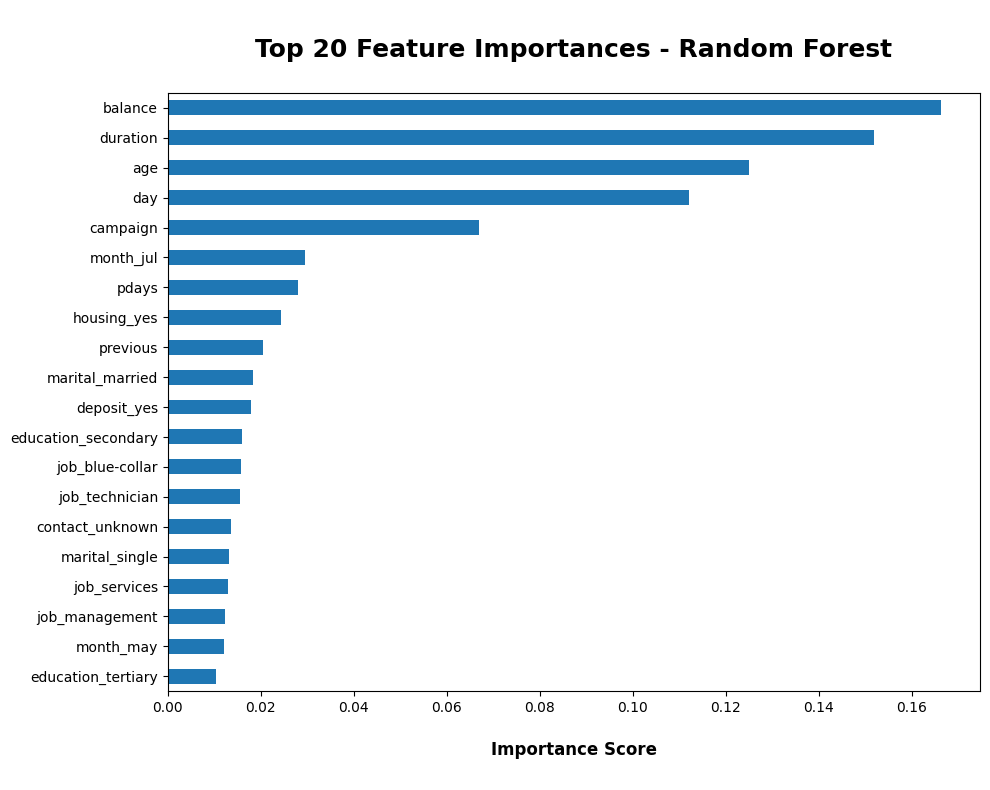

In [85]:
# Create a Series for plotting
importances = pd.Series(model.feature_importances_, index=all_features)

# Plot top 20 most important features
importances.sort_values(ascending=True).tail(20).plot(kind='barh', figsize=(10, 8))
plt.title("\nTop 20 Feature Importances - Random Forest\n", fontsize=18, fontweight='bold')
plt.xlabel("\nImportance Score\n", fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

Task 4 – Insurance Claim Prediction
🚀 (Internship) Task 4 Completed: Predicting Insurance Claim Accounts

As part of my Data Science & Machine Learning Internship, I’ve now completed Task 4, which focused on predicting whether customers would make an insurance claim based on their demographic and policy details.

🔹 Cleaned and preprocessed the dataset for accurate analysis
🔹 Conducted exploratory data analysis (EDA) to identify trends and correlations
🔹 Built insightful visualizations:

Heatmap – understanding correlations between features

Scatter Plots – visualizing relationships between key numerical variables and claim status
🔹 Implemented and trained a classification model for prediction
🔹 Evaluated performance metrics to measure model reliability

Tools used: Python | Jupyter | Pandas | Matplotlib | Seaborn | Scikit-learn

📎 Check out the code and results here:
Repository: [Insert your GitHub link]

This task gave me practical exposure to insurance analytics, customer risk profiling, and predictive modeling for decision-making.
🙌 Grateful to DevelopersHub Corporation© for this continuous learning journey.

#DataScience #MachineLearning #Python #Visualization #EDA #Heatmap #ScatterPlot #ScikitLearn #Internship #DevelopersHub #InsuranceAnalytics #LearningByDoing





Task 5 – Personal Loan Prediction
🚀 (Internship) Task 5 Completed: Personal Loan Prediction

As part of my Data Science & Machine Learning Internship, I’ve now completed Task 5, where I worked on predicting whether a customer will opt for a personal loan based on their profile and financial indicators.

🔹 Preprocessed and cleaned the dataset for modeling
🔹 Performed EDA to discover patterns influencing loan acceptance
🔹 Created impactful visualizations:

Count Plot – understanding class distribution

Heatmaps – exploring correlations between features and loan status

Box Plot – analyzing spread and outliers in customer data

Confusion Matrix – evaluating model predictions

Feature Importance Chart – ranking variables influencing loan decisions
🔹 Trained and validated a classification model for prediction
🔹 Interpreted results to identify the strongest predictors

Tools used: Python | Jupyter | Pandas | Seaborn | Matplotlib | Scikit-learn

📎 Check out the code and results here:
Repository: [Insert your GitHub link]

This project improved my skills in financial analytics, classification algorithms, and turning raw data into actionable business insights.
🙌 Thankful to DevelopersHub Corporation© for providing hands-on, real-world projects.

#DataScience #MachineLearning #Python #EDA #Visualization #LoanPrediction #ConfusionMatrix #FeatureImportance #Internship #DevelopersHub #LearningByDoing

